<a href="https://colab.research.google.com/github/Nhatnguyen2001/AI_Exercise/blob/main/CNN_EMOTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NGUYỄN ĐÌNH NHẬT**

In [16]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_CNN/Emotion/train',target_size=(150,150), batch_size=40, class_mode='categorical')
#validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_CNN/Emotion/train/test',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 98 images belonging to 4 classes.


In [20]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Gian_du': 0, 'buon': 1, 'hanh_phuc': 2, 'ngac_nhien': 3}

In [21]:
#Tạo Model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 64)      

In [41]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 50, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
3/3 [==============================] - 3s 881ms/step - loss: 28.2658 - accuracy: 0.4898
Epoch 2/50
3/3 [==============================] - 2s 865ms/step - loss: 24.8559 - accuracy: 0.4490
Epoch 3/50
3/3 [==============================] - 2s 666ms/step - loss: 10.9272 - accuracy: 0.5408
Epoch 4/50
3/3 [==============================] - 2s 644ms/step - loss: 1.2402 - accuracy: 0.8061
Epoch 5/50
3/3 [==============================] - 2s 873ms/step - loss: 0.4214 - accuracy: 0.8878
Epoch 6/50
3/3 [==============================] - 2s 620ms/step - loss: 0.1973 - accuracy: 0.9388
Epoch 7/50
3/3 [==============================] - 2s 645ms/step - loss: 0.0363 - accuracy: 0.9898
Epoch 8/50
3/3 [==============================] - 2s 675ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 9/50
3/3 [==============================] - 2s 863ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 10/50
3/3 [==============================] - 2s 650ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 11/50
3/3 

In [42]:
model.save('CNN_emotion.h5')

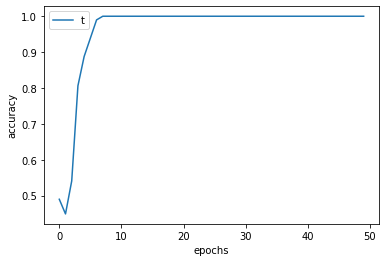

In [43]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend('train')
plt.show()

In [44]:
CNN_emotion =load_model('CNN_emotion.h5')

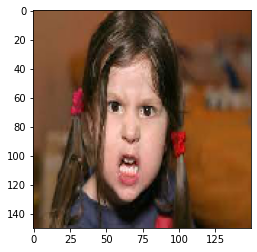

In [57]:
img_path = '/content/dandu_test1.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['Gian_du','buon','hanh_phuc','ngac_nhien']

In [58]:
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])

0
Gian_du


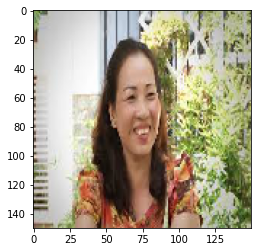

In [59]:
img_path = '/content/hanhphuc_test.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['Gian_du','buon','hanh_phuc','ngac_nhien']

In [60]:
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])

2
hanh_phuc


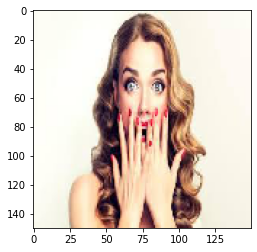

In [67]:
img_path = '/content/ngac_nhien_test.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['Gian_du','buon','hanh_phuc','ngac_nhien']

In [68]:
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])

3
ngac_nhien


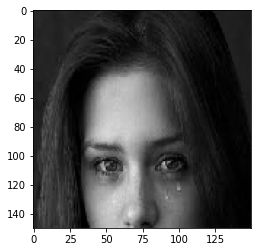

In [71]:
img_path = '/content/buon_test1.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
emotion=np.argmax(CNN_emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['Gian_du','buon','hanh_phuc','ngac_nhien']

In [72]:
print(np.argmax(pred))
if emotion==0: print(classes[0])
elif emotion==1: print(classes[1])
elif emotion==2: print(classes[2])
elif emotion==3: print(classes[3])

1
buon
